# From Lifestyle to Life Satisfaction: Predictive Modeling of Wellbeing  
 
**What is the problem?**  
Many individuals struggle with maintaining a healthy work-life balance, which affects their mental health, productivity, and overall wellbeing. However, few tools help individuals proactively assess and improve their lifestyle habits using data.

**Who is affected by it?**  

Employees suffering from burnout or chronic stress
Employers concerned with engagement and retention
Wellness coaches and HR departments
Individuals who want to improve wellbeing  

**Why solving it matters (value proposition)?**

Helps individuals understand how daily habits influence wellbeing
Supports data-driven health recommendations
Enables organizations to identify at-risk groups and promote preventive care

# Import Libraries & Load the Dataset

In [11]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [13]:
# Load dataset
df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


# Data Processing

In [16]:
# Show DataFrame structure in table format
def display_dataframe_info(df):
    print("Dataset Overview")
    print(f"- Total entries (rows): {df.shape[0]}")
    print(f"- Total columns: {df.shape[1]}")
    print(f"- Memory usage: ~{round(df.memory_usage(deep=True).sum() / 1e6, 2)} MB")
    print("\nColumn Summary:\n")

    info_df = pd.DataFrame({
        "Column Name": df.columns,
        "Non-Null Count": df.notnull().sum().values,
        "Dtype": df.dtypes.values
    })

    print(tabulate(info_df.reset_index(drop=True), headers='keys', tablefmt='fancy_grid', showindex=True))

    print("\nData Quality Summary:\n")
    null_counts = df.isnull().sum()
    if null_counts.sum() == 0:
        print("No null values found.")
    else:
        print(tabulate(null_counts[null_counts > 0].reset_index().rename(columns={'index': 'Column', 0: 'Null Count'}),
                       headers='keys', tablefmt='grid'))

    dupes = df.duplicated().sum()
    print(f"\nDuplicate Rows: {dupes}")

display_dataframe_info(df)
print("-----------")
df.describe()

Dataset Overview
- Total entries (rows): 15972
- Total columns: 24
- Memory usage: ~6.07 MB

Column Summary:

╒════╤═════════════════════════╤══════════════════╤═════════╕
│    │ Column Name             │   Non-Null Count │ Dtype   │
╞════╪═════════════════════════╪══════════════════╪═════════╡
│  0 │ Timestamp               │            15972 │ object  │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  1 │ FRUITS_VEGGIES          │            15972 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  2 │ DAILY_STRESS            │            15972 │ object  │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  3 │ PLACES_VISITED          │            15972 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  4 │ CORE_CIRCLE             │            15972 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  5 │ SUPPORTING_OTHERS       │            15972 │ int64   │
├────┼────────────────

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


## Data Cleaning

In [19]:
# Drop irrelevant columns
df.drop(columns=["Timestamp"], inplace=True)

# Strip and standardize string fields
for col in ['DAILY_STRESS', 'AGE', 'GENDER']:
    df[col] = df[col].astype(str).str.strip().str.lower()

df = df.fillna("missing_value").drop_duplicates().replace("missing_value", pd.NA)

# Drop duplicates (if any)
df = df.drop_duplicates()

# Check rows causing the issue
df[df['DAILY_STRESS'].str.contains("1/1/00", na=False)]

# Remove or correct
df = df[df['DAILY_STRESS'] != "1/1/00"]

# Example: classify WLB scores based on median
threshold = df['WORK_LIFE_BALANCE_SCORE'].median()
df['WLB_group'] = df['WORK_LIFE_BALANCE_SCORE'].apply(lambda x: 'high' if x > threshold else 'low')


# Confirm cleaning
display_dataframe_info(df)


Dataset Overview
- Total entries (rows): 15288
- Total columns: 24
- Memory usage: ~5.85 MB

Column Summary:

╒════╤═════════════════════════╤══════════════════╤═════════╕
│    │ Column Name             │   Non-Null Count │ Dtype   │
╞════╪═════════════════════════╪══════════════════╪═════════╡
│  0 │ FRUITS_VEGGIES          │            15288 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  1 │ DAILY_STRESS            │            15288 │ object  │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  2 │ PLACES_VISITED          │            15288 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  3 │ CORE_CIRCLE             │            15288 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  4 │ SUPPORTING_OTHERS       │            15288 │ int64   │
├────┼─────────────────────────┼──────────────────┼─────────┤
│  5 │ SOCIAL_NETWORK          │            15288 │ int64   │
├────┼────────────────

# EDA - Insights & Visualizations

## Distribution + Boxplots by Groups

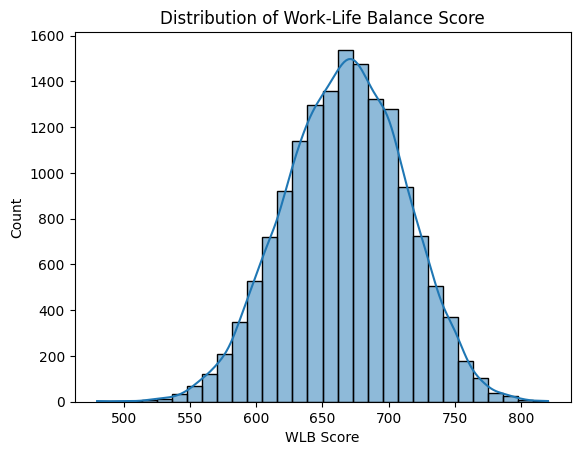

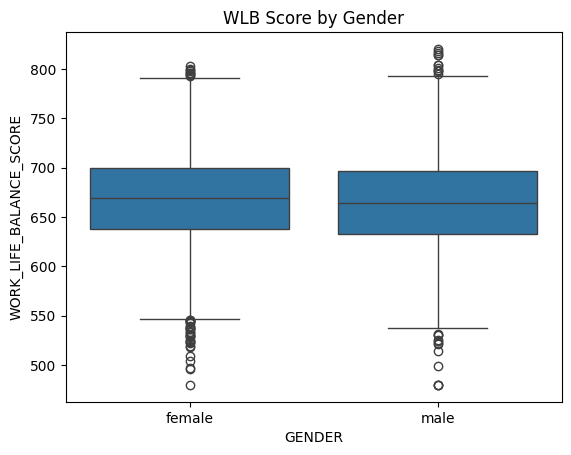

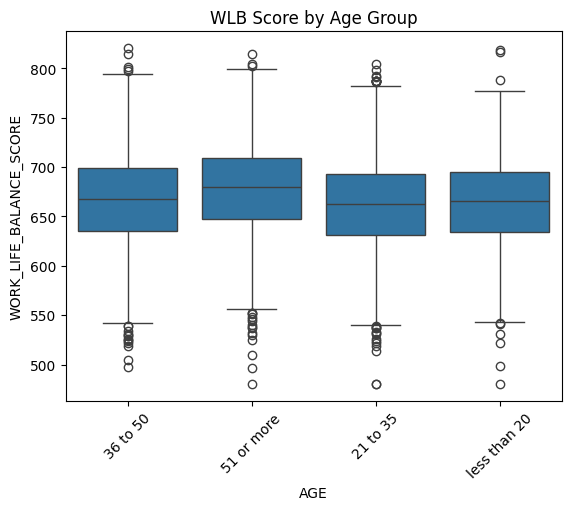

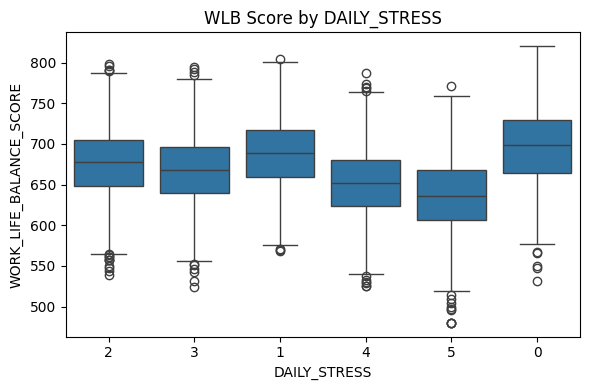

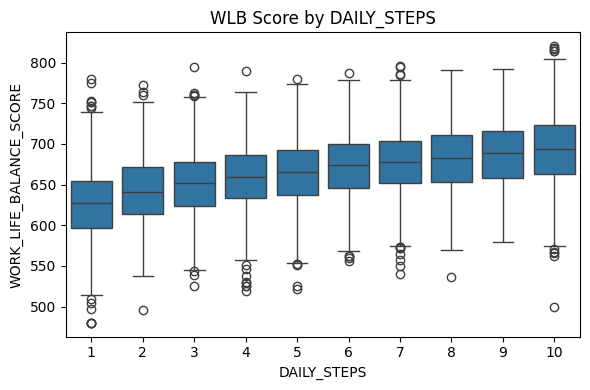

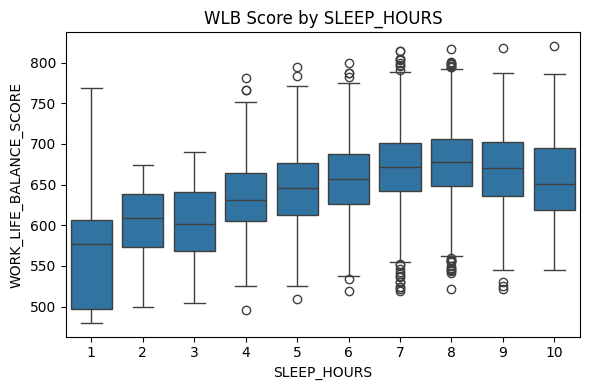

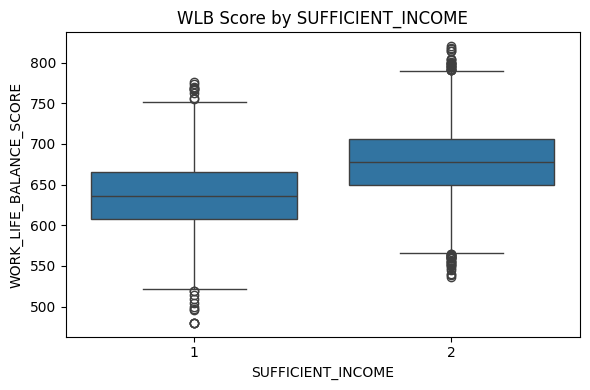

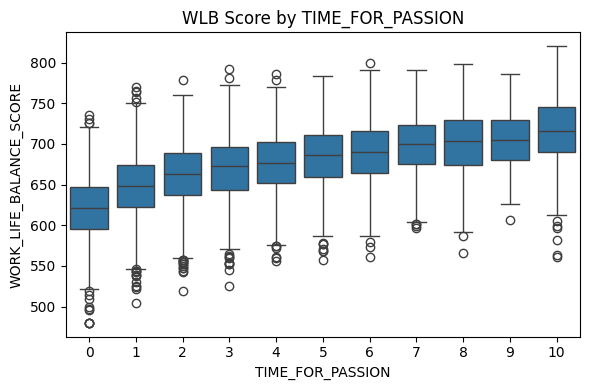

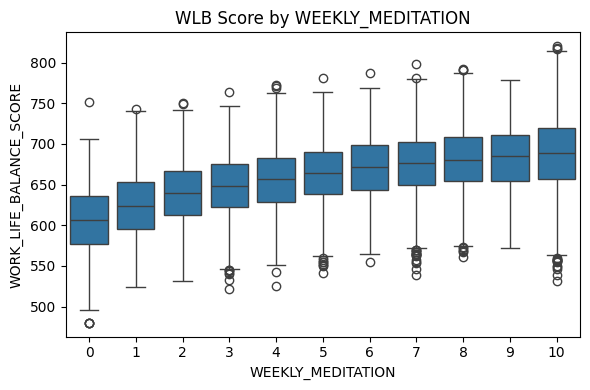

In [23]:
# Histogram of WLB Score
sns.histplot(df['WORK_LIFE_BALANCE_SCORE'], bins=30, kde=True)
plt.title("Distribution of Work-Life Balance Score")
plt.xlabel("WLB Score")
plt.show()

# Boxplot by Gender
sns.boxplot(x='GENDER', y='WORK_LIFE_BALANCE_SCORE', data=df)
plt.title("WLB Score by Gender")
plt.show()

# Boxplot by Age Group
sns.boxplot(x='AGE', y='WORK_LIFE_BALANCE_SCORE', data=df)
plt.title("WLB Score by Age Group")
plt.xticks(rotation=45)
plt.show()

#Choose relevant features manually or based on correlation
selected_cols = ['DAILY_STRESS', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME', 
                 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']  # Example shortlist

# Create boxplots with WORK_LIFE_BALANCE_SCORE as y-axis
for col in selected_cols:
    if df[col].nunique() < 15:  # boxplot works best for low-cardinality variables
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col, y='WORK_LIFE_BALANCE_SCORE', data=df)
        plt.title(f'WLB Score by {col}')
        plt.tight_layout()
        plt.show()
    else:
        # Use scatterplot or regplot for high-cardinality features
        plt.figure(figsize=(6, 4))
        sns.regplot(x=col, y='WORK_LIFE_BALANCE_SCORE', data=df, scatter_kws={'alpha':0.3})
        plt.title(f'WLB Score vs {col}')
        plt.tight_layout()
        plt.show()



## Order of Variables Correlated with WLB from Greatest to Least

Top correlated features with WORK_LIFE_BALANCE_SCORE:
['ACHIEVEMENT', 'SUPPORTING_OTHERS', 'TODO_COMPLETED', 'PLACES_VISITED', 'TIME_FOR_PASSION', 'CORE_CIRCLE', 'PERSONAL_AWARDS', 'FLOW', 'LIVE_VISION', 'DONATION', 'FRUITS_VEGGIES', 'DAILY_STEPS', 'WEEKLY_MEDITATION', 'SOCIAL_NETWORK', 'SUFFICIENT_INCOME', 'DAILY_SHOUTING', 'LOST_VACATION', 'BMI_RANGE', 'SLEEP_HOURS']


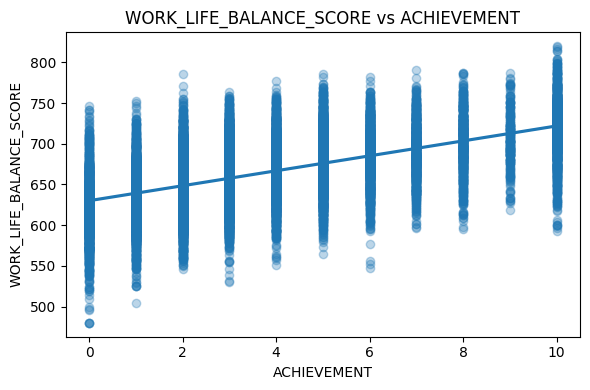

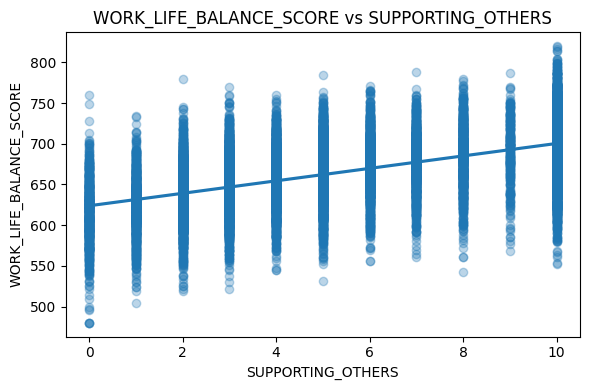

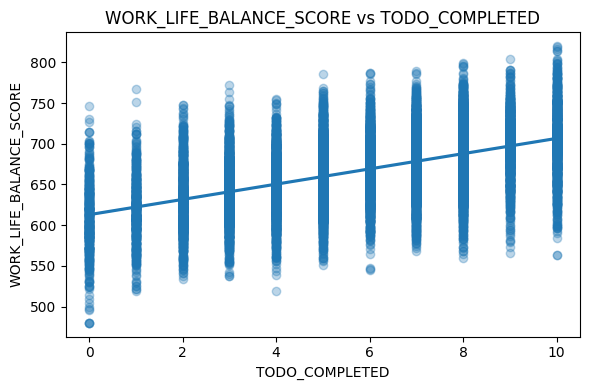

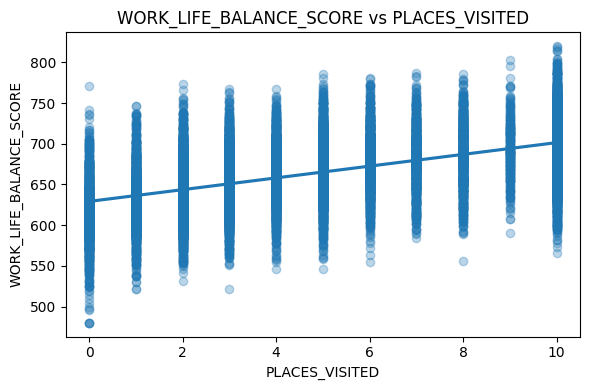

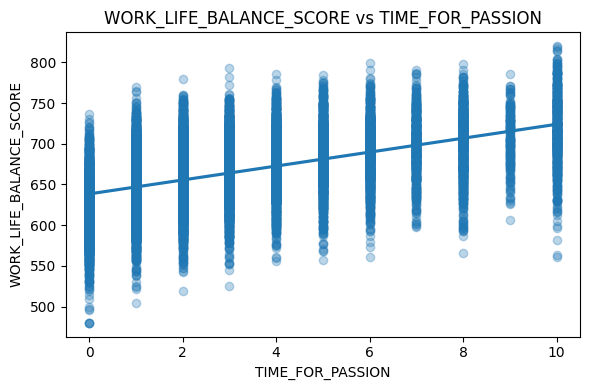

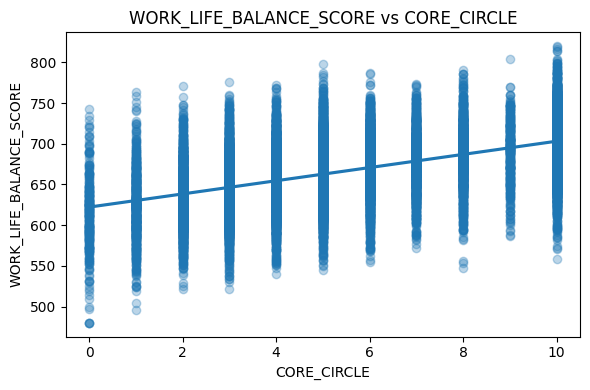

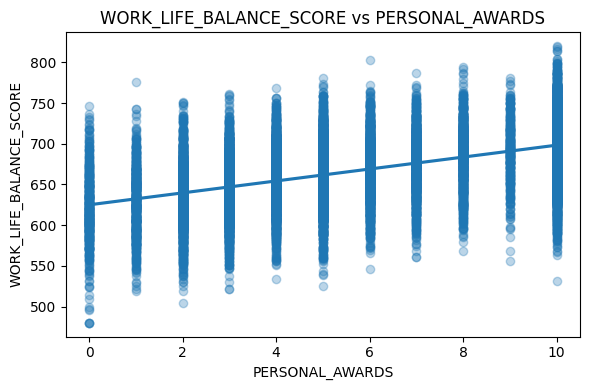

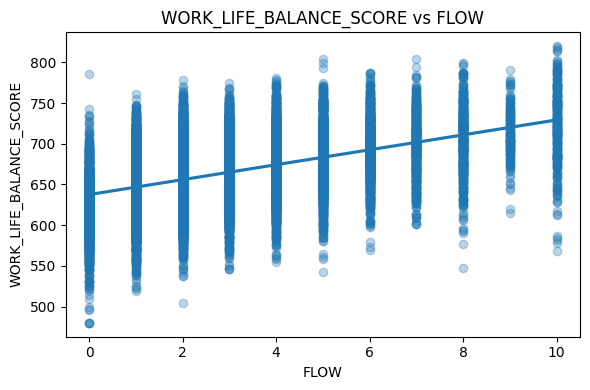

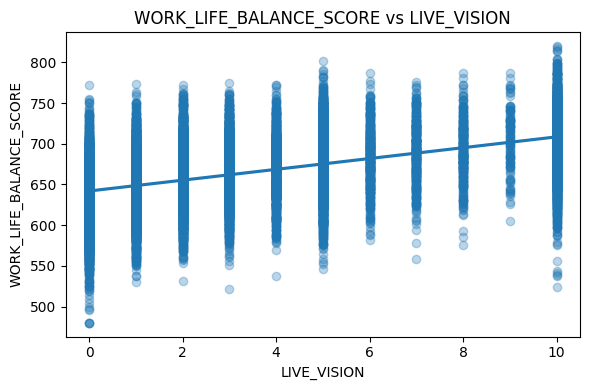

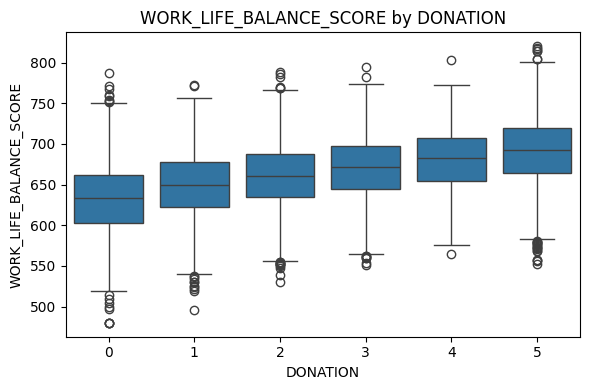

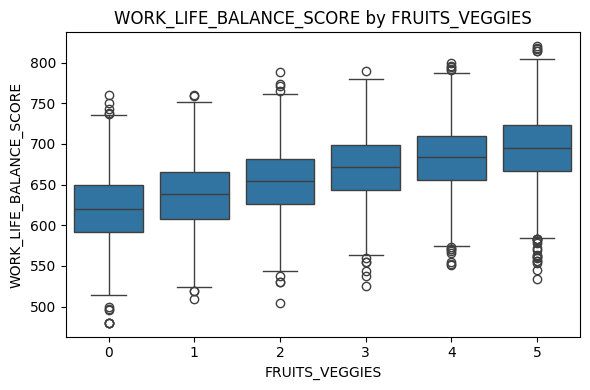

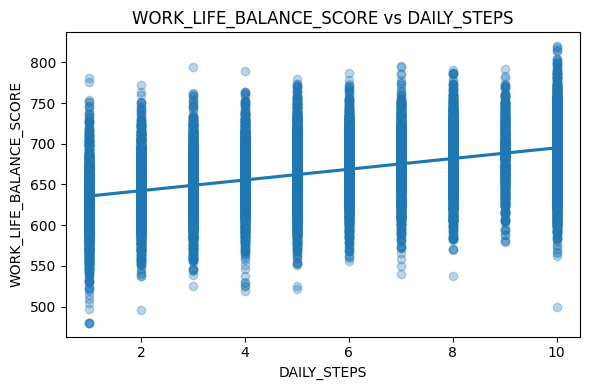

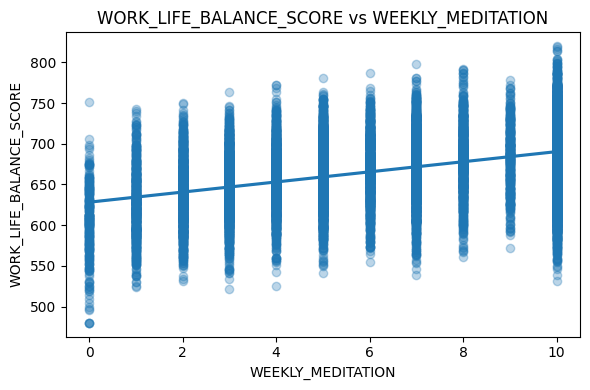

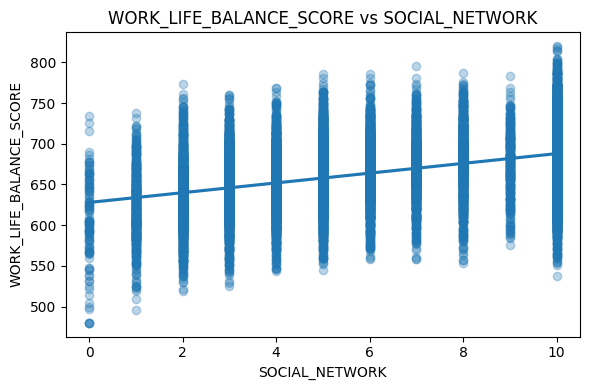

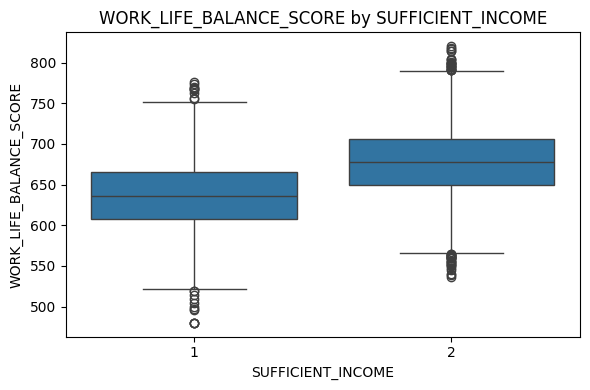

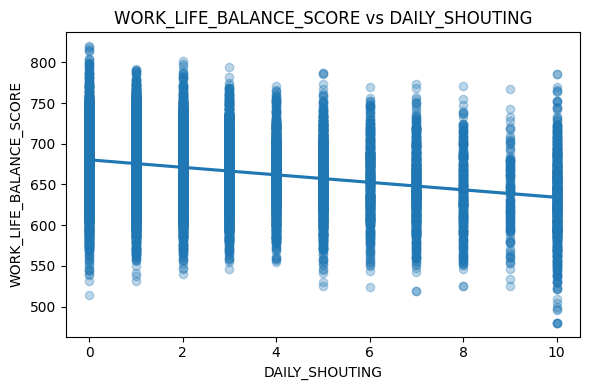

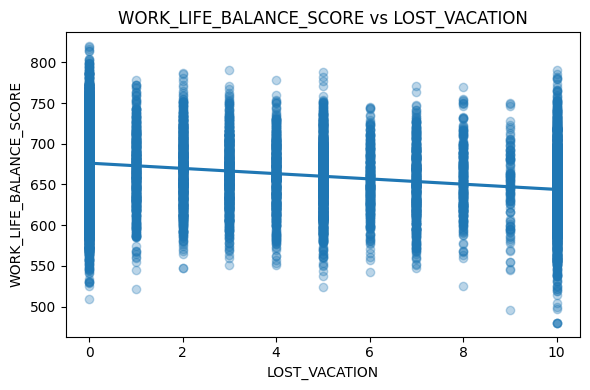

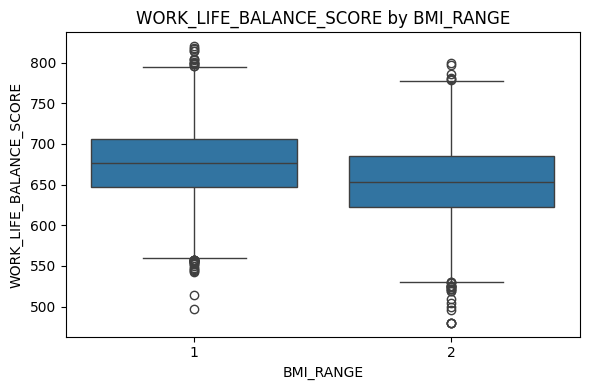

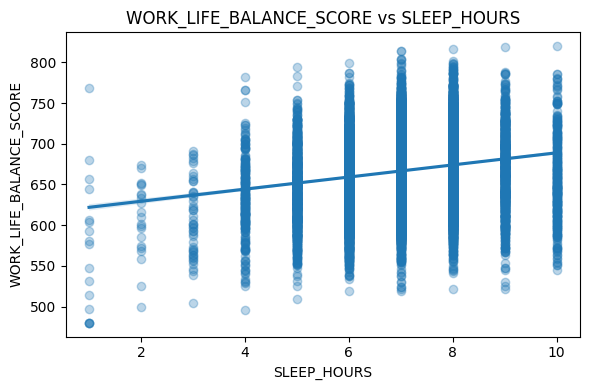

In [25]:
# Clean column names just in case
df.columns = df.columns.str.strip()

# Auto-detect numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure target column is included for correlation calculation
target = 'WORK_LIFE_BALANCE_SCORE'
if target not in numerical_cols:
    numerical_cols_with_target = numerical_cols + [target]
else:
    numerical_cols_with_target = numerical_cols

# Calculate absolute correlations with the target
correlations = df[numerical_cols_with_target].corr()[target].abs().sort_values(ascending=False)

# Select top 5 features (excluding the target itself)
top_cols = correlations.drop(target).head(21).index.tolist()

print("Top correlated features with WORK_LIFE_BALANCE_SCORE:")
print(top_cols)

# Plot relationships
for col in top_cols:
    plt.figure(figsize=(6, 4))

    if df[col].nunique() < 10:  # Categorical or ordinal-ish
        sns.boxplot(x=col, y=target, data=df)
        plt.title(f'{target} by {col}')
    else:  # Continuous
        sns.regplot(x=col, y=target, data=df, scatter_kws={'alpha':0.3})
        plt.title(f'{target} vs {col}')

    plt.tight_layout()
    plt.show()


## Correlation Heatmap

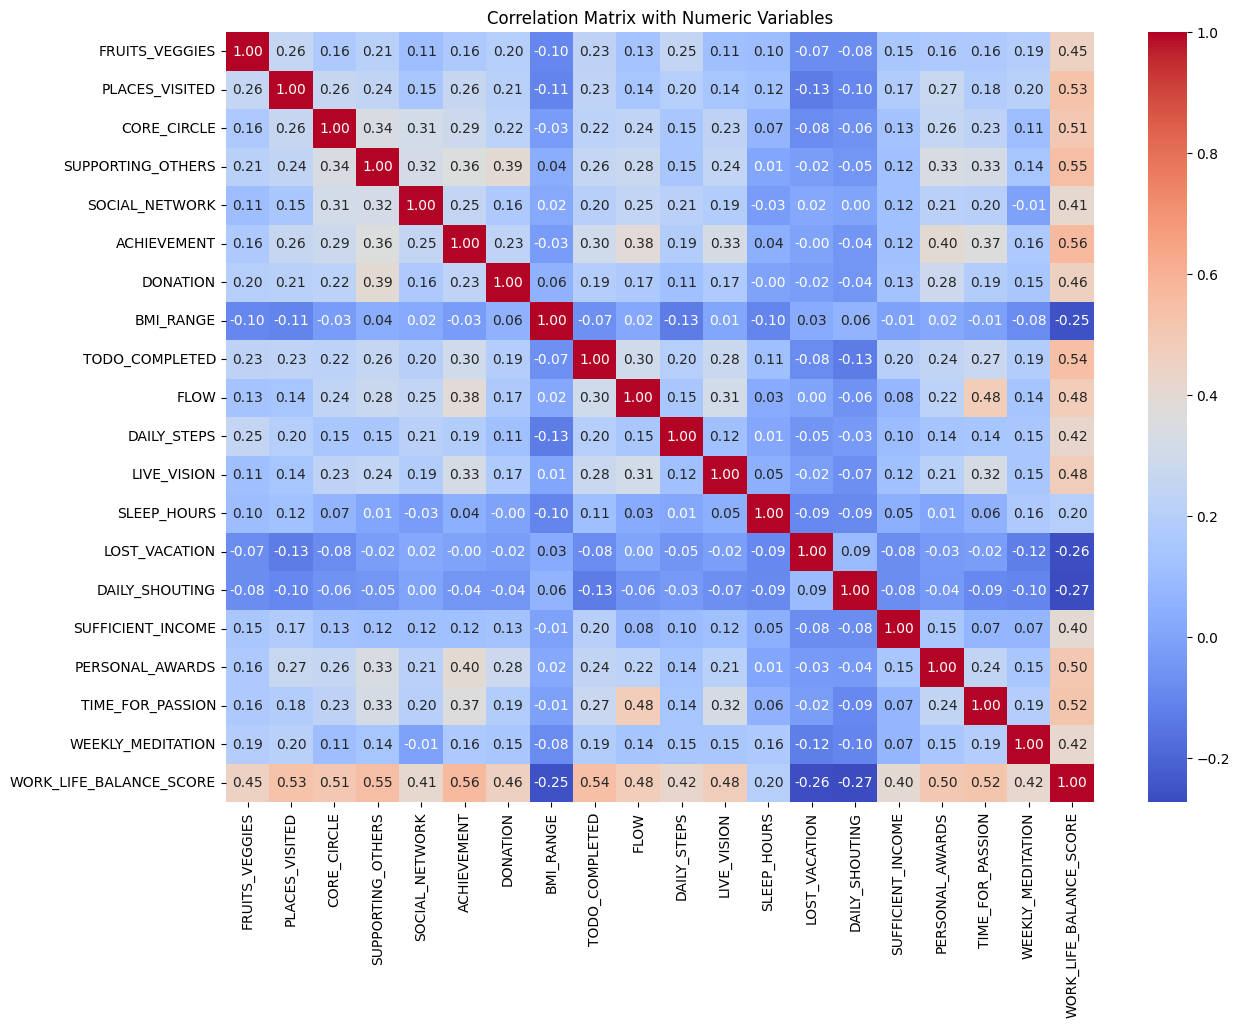

In [27]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Numeric Variables")
plt.show()


## Scatterplots for Lifestyle Variables

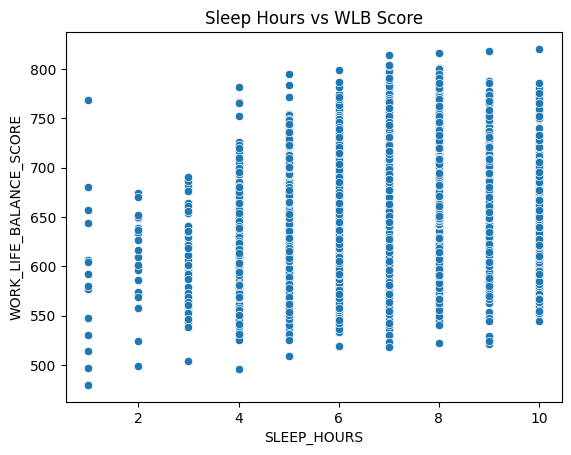

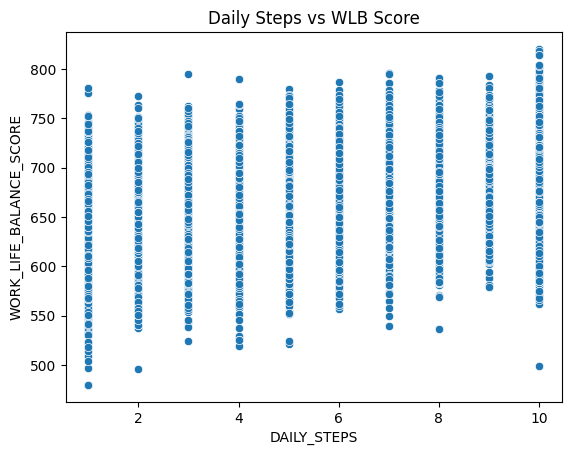

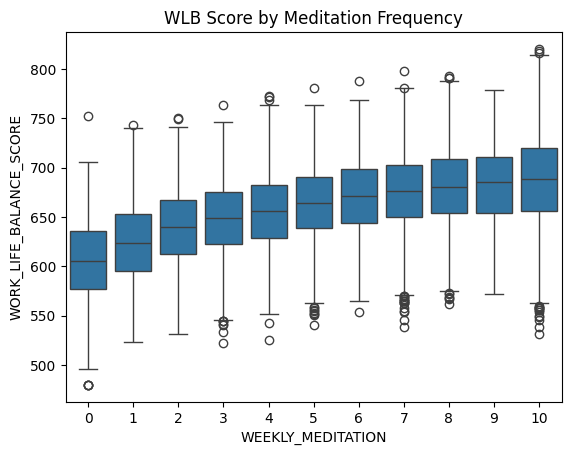

In [29]:
# Sleep Hours vs WLB
sns.scatterplot(x='SLEEP_HOURS', y='WORK_LIFE_BALANCE_SCORE', data=df)
plt.title("Sleep Hours vs WLB Score")
plt.show()

# Daily Steps vs WLB
sns.scatterplot(x='DAILY_STEPS', y='WORK_LIFE_BALANCE_SCORE', data=df)
plt.title("Daily Steps vs WLB Score")
plt.show()

# Meditation Frequency vs WLB (if exists)

sns.boxplot(x='WEEKLY_MEDITATION', y='WORK_LIFE_BALANCE_SCORE', data=df)
plt.title("WLB Score by Meditation Frequency")
plt.show()


## Work Life Balance Target Variable

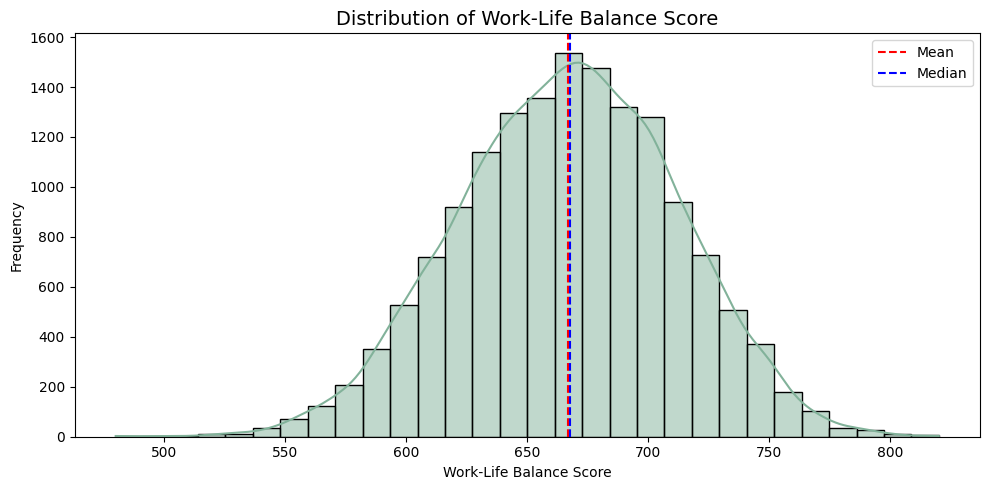

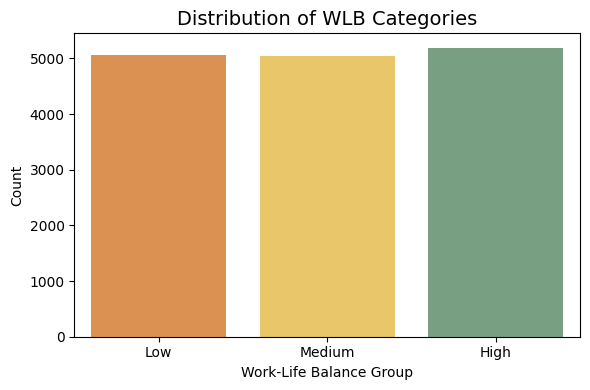

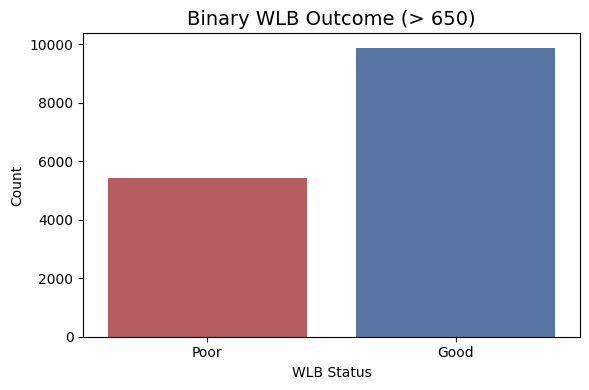

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Histogram of the numerical WORK_LIFE_BALANCE_SCORE
plt.figure(figsize=(10, 5))
sns.histplot(df['WORK_LIFE_BALANCE_SCORE'], kde=True, bins=30, color="#82B29A")
plt.axvline(df['WORK_LIFE_BALANCE_SCORE'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['WORK_LIFE_BALANCE_SCORE'].median(), color='blue', linestyle='--', label='Median')
plt.title("Distribution of Work-Life Balance Score", fontsize=14)
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Distribution of categories: Low, Medium, High
# If not already in df:
low_thresh = df['WORK_LIFE_BALANCE_SCORE'].quantile(0.33)
high_thresh = df['WORK_LIFE_BALANCE_SCORE'].quantile(0.66)

def assign_wlb_group(score):
    if score <= low_thresh:
        return 'Low'
    elif score <= high_thresh:
        return 'Medium'
    else:
        return 'High'

df['WLB_group'] = df['WORK_LIFE_BALANCE_SCORE'].apply(assign_wlb_group)

# Plot distribution of categories
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='WLB_group', palette=['#F28F3B', '#FFCF56', '#73A580'], order=['Low', 'Medium', 'High'])
plt.title("Distribution of WLB Categories", fontsize=14)
plt.xlabel("Work-Life Balance Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. Binary outcome column: > 650
df['WLB_binary'] = df['WORK_LIFE_BALANCE_SCORE'].apply(lambda x: 'Good' if x > 650 else 'Poor')

# Plot binary outcome
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='WLB_binary', palette=['#C44E52', '#4C72B0'])
plt.title("Binary WLB Outcome (> 650)", fontsize=14)
plt.xlabel("WLB Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Observations**
- First plot: Shows the distribution of the raw WLB score with mean and median lines.
- Second plot: Visualizes Low / Medium / High categories based on tertiles.
- Third plot: Creates and visualizes a binary classification where scores > 650 are considered "Good".

# Statistical Testing
## Categorical Variables - ANOVA or Kruskal-Wallis

In [47]:
from scipy.stats import f_oneway, kruskal

# Define categorical features to test
cat_features = ['DAILY_STRESS', 'AGE', 'GENDER']  # modify if needed

print("📊 Categorical Features vs WLB Score (ANOVA/Kruskal-Wallis):\n")

for col in cat_features:
    groups = [group[target].dropna() for _, group in df.groupby(col)]
    
    if all(len(g) > 1 for g in groups):  # Ensure valid group sizes
        try:
            f_stat, p_val = f_oneway(*groups)
            test = 'ANOVA'
        except:
            # fallback if assumptions violated
            f_stat, p_val = kruskal(*groups)
            test = 'Kruskal-Wallis'
        
        print(f"{col} → {test}: p = {p_val:.4f} {'✅ significant' if p_val < 0.05 else '❌ not significant'}")
    else:
        print(f"{col} → skipped (some groups too small)")


📊 Categorical Features vs WLB Score (ANOVA/Kruskal-Wallis):

DAILY_STRESS → ANOVA: p = 0.0000 ✅ significant
AGE → ANOVA: p = 0.0000 ✅ significant
GENDER → ANOVA: p = 0.0000 ✅ significant


### Numeric Features - Pearson Correlation Test

In [49]:
from scipy.stats import pearsonr, spearmanr

# Numeric features (excluding the target)
num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)

print("\n📈 Numeric Features vs WLB Score (Pearson/Spearman):\n")

for col in num_features:
    # Drop missing values pairwise
    clean_df = df[[col, target]].dropna()
    
    # Pearson if normal, otherwise Spearman (safe fallback)
    try:
        corr, p_val = pearsonr(clean_df[col], clean_df[target])
        test = 'Pearson'
    except:
        corr, p_val = spearmanr(clean_df[col], clean_df[target])
        test = 'Spearman'

    print(f"{col} → {test} r = {corr:.2f}, p = {p_val:.4f} {'✅ significant' if p_val < 0.05 else '❌ not significant'}")



📈 Numeric Features vs WLB Score (Pearson/Spearman):

FRUITS_VEGGIES → Pearson r = 0.45, p = 0.0000 ✅ significant
PLACES_VISITED → Pearson r = 0.53, p = 0.0000 ✅ significant
CORE_CIRCLE → Pearson r = 0.51, p = 0.0000 ✅ significant
SUPPORTING_OTHERS → Pearson r = 0.55, p = 0.0000 ✅ significant
SOCIAL_NETWORK → Pearson r = 0.41, p = 0.0000 ✅ significant
ACHIEVEMENT → Pearson r = 0.56, p = 0.0000 ✅ significant
DONATION → Pearson r = 0.46, p = 0.0000 ✅ significant
BMI_RANGE → Pearson r = -0.25, p = 0.0000 ✅ significant
TODO_COMPLETED → Pearson r = 0.54, p = 0.0000 ✅ significant
FLOW → Pearson r = 0.48, p = 0.0000 ✅ significant
DAILY_STEPS → Pearson r = 0.42, p = 0.0000 ✅ significant
LIVE_VISION → Pearson r = 0.48, p = 0.0000 ✅ significant
SLEEP_HOURS → Pearson r = 0.20, p = 0.0000 ✅ significant
LOST_VACATION → Pearson r = -0.26, p = 0.0000 ✅ significant
DAILY_SHOUTING → Pearson r = -0.27, p = 0.0000 ✅ significant
SUFFICIENT_INCOME → Pearson r = 0.40, p = 0.0000 ✅ significant
PERSONAL_AWARD

### Multiple Regression

In [51]:
import statsmodels.api as sm

# Select top predictors
features = ['DAILY_STRESS', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION']

# Subset and convert all columns to float (True/False becomes 1.0/0.0)
X = df[features].copy().astype(float)
y = df['WORK_LIFE_BALANCE_SCORE'].astype(float)

# Drop rows with NaNs
X = X.dropna()
y = y.loc[X.index]  # Align y to X

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.571
Model:                                 OLS   Adj. R-squared:                  0.571
Method:                      Least Squares   F-statistic:                     4067.
Date:                     Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                             08:36:36   Log-Likelihood:                -73438.
No. Observations:                    15288   AIC:                         1.469e+05
Df Residuals:                        15282   BIC:                         1.469e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

**Observations**
- Stress decreases WLB.
- Income, sleep, steps, and time for passion all boost WLB.
- SUFFICIENT_INCOME has the biggest effect size.
- The model is statistically strong and explains over half the variability in WLB scores.

# Text Simulation for NLP

In [ ]:
from openai import OpenAI
import random
import pandas as pd
import time
import getpass

# --- Step 1: Authenticate with OpenAI ---
api_key = getpass.getpass("Enter your OpenAI API key: ")
client = OpenAI(api_key=api_key)

# --- Step 2: Define generation function with 3-level mood control ---
def generate_note(score_range):
    mood_prompt = {
        "high": "positive and grateful",
        "medium": "neutral and reflective",
        "low": "negative and overwhelmed"
    }.get(score_range, "neutral")

    user_prompt = (
        f"Write a short, statement from someone with a {mood_prompt} work-life balance. "
        f"Include everyday feelings, tone, and energy. Speak informally and make a random comment. They do not all need to start the same or have a same format. "
        f"Please include topics like stress, eating habits, rest, workload, travel, social life, achievements, daily steps, health, time for self, income, burnout, or excitement. "
        f"Vary the content naturally — not all topics need to appear in each entry. Keep it real and personal."
    )

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant writing realistic, emotionally expressive lifestyle journal entries."},
                {"role": "user", "content": user_prompt}
            ],
            max_tokens=100,
            temperature=0.85,
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error: {e}")
        return None

# --- Step 3: Simulate DataFrame with 3 WLB categories ---
n_samples = 1000
notes = []
scores = []
groups = []

for _ in range(n_samples):
    group = random.choices(["low", "medium", "high"], weights=[0.3, 0.4, 0.3])[0]  # Adjust proportions as needed
    note = generate_note(group)
    if note:
        if group == "high":
            score = random.uniform(700, 800)
        elif group == "medium":
            score = random.uniform(660, 699)
        else:
            score = random.uniform(500, 650)
        notes.append(note)
        scores.append(round(score, 1))
        groups.append(group)
    time.sleep(1.2)  # avoid rate limit

# --- Step 4: Assemble DataFrame ---
df_simulated = pd.DataFrame({
    "WORK_LIFE_BALANCE_SCORE": scores,
    "WLB_group": groups,
    "Lifestyle_Notes": notes
})

# --- Step 5: Preview ---
display(df_simulated.head(10))


In [58]:
# Skip OpenAI generation and just load saved data:
df_simulated = pd.read_csv("simulated_lifestyle_notes.csv")
df.shape

(15288, 26)

In [61]:
def categorize_wlb(score):
    if score < 600:
        return "low"
    elif score < 700:
        return "medium"
    else:
        return "high"

df_simulated["WLB_Group"] = df_simulated["WORK_LIFE_BALANCE_SCORE"].apply(categorize_wlb)



In [63]:

import random
# Create dict of grouped lists
grouped_notes = df_simulated.groupby("WLB_Group")["Lifestyle_Notes"].apply(list).to_dict()

# Shuffle to ensure variety
for group in grouped_notes:
    random.shuffle(grouped_notes[group])

# Create pointer counters
group_counters = {"low": 0, "medium": 0, "high": 0}
group_lengths = {k: len(v) for k, v in grouped_notes.items()}

# Assign notes
def assign_note(group):
    idx = group_counters[group]
    note = grouped_notes[group][idx % group_lengths[group]]
    group_counters[group] += 1
    return note

df_simulated["Lifestyle_Notes"] = df_simulated["WLB_Group"].apply(assign_note)


In [60]:
df_simulated[["WORK_LIFE_BALANCE_SCORE", "WLB_Group", "Lifestyle_Notes"]].sample(5)


,WORK_LIFE_BALANCE_SCORE,WLB_Group,Lifestyle_Notes
594,662.3,medium,Today was a good day. Managed to finish my tas...
797,578.0,low,I barely had time to breathe today. Work is pi...
390,578.1,low,"Ugh, today was just one of those days where ev..."
103,666.2,medium,Today has been one of those days where work an...
777,664.8,medium,Today was a balancing act. Juggling work tasks...


# Text EDA

### Basic Text Preprocessing - Text Cleaning & Tokenizaiton

#### Convert Text

In [65]:
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Custom stopwords to remove
custom_stopwords = {"hey", "today", "the", "feel", "day", "find", "a", "like", "work", "thing", "get", "just"}

# Text cleaning function
def convert_text(text):
    doc = nlp(text)
    tokens = []

    for token in doc:
        lemma = token.lemma_.lower().strip()

        if (
            token.is_alpha                                # Keep alphabetic only
            and not token.is_stop                         # Remove default stopwords
            and not token.ent_type_                       # Optional: skip named entities
            and lemma not in custom_stopwords             # Remove your custom words
            and len(lemma) > 2                            # Remove short filler like "uh"
        ):
            tokens.append(lemma)

    return ' '.join(tokens)

# --- Apply cleaning to the correct DataFrame ---
df_simulated['clean_text'] = df_simulated['Lifestyle_Notes'].apply(convert_text)
df_simulated['tokens'] = df_simulated['clean_text'].apply(lambda x: x.split())

# Extra safety: filter out any remaining custom stopwords
df_simulated['filtered_tokens'] = df_simulated['tokens'].apply(
    lambda token_list: [w for w in token_list if w not in custom_stopwords]
)

# --- View results ---
# Preview cleaned text
df_simulated[['Lifestyle_Notes', 'clean_text', 'filtered_tokens']].sample(5)



,Lifestyle_Notes,clean_text,filtered_tokens
511,Hey there! Just wanted to take a moment to exp...,want moment express grateful life balance mome...,"[want, moment, express, grateful, life, balanc..."
940,Just got back from a revitalizing yoga class a...,revitalize yoga class productive grateful bala...,"[revitalize, yoga, class, productive, grateful..."
510,Today was such a wonderful day at work! I was ...,wonderful able tackle workload efficiently ove...,"[wonderful, able, tackle, workload, efficientl..."
587,Today was a good day. I woke up feeling refres...,wake feeling refresh restful night sleep enjoy...,"[wake, feeling, refresh, restful, night, sleep..."
513,"It's been a rough week, feeling like I'm drown...",drown responsibility stress catch break worklo...,"[drown, responsibility, stress, catch, break, ..."


### Word Frequency

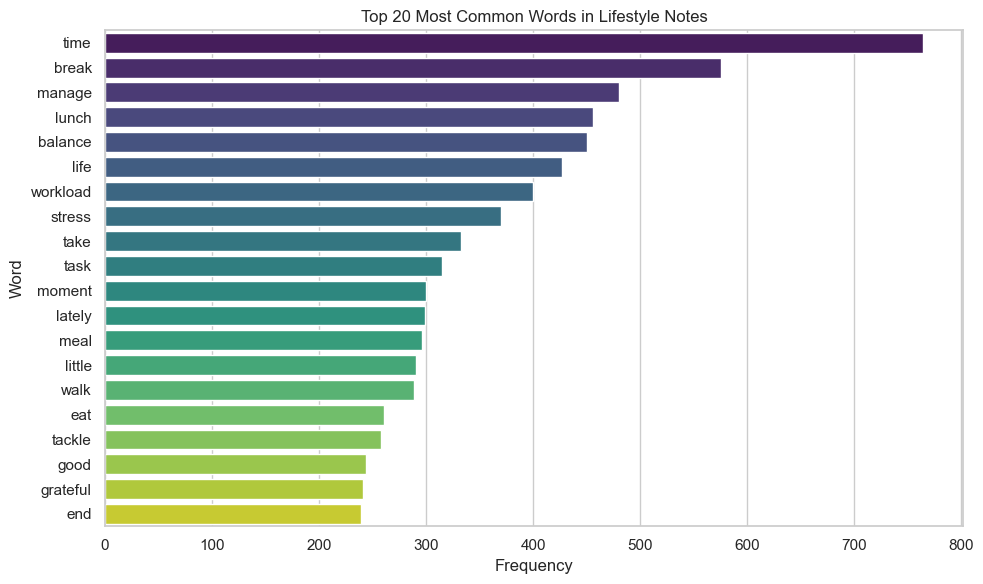

In [932]:
from collections import Counter

# Words to remove
custom_stopwords = {"today", "the", "feel", "day", "find", "a"}

# Remove from tokens column
df_simulated['filtered_tokens'] = df_simulated['tokens'].apply(lambda token_list: [word for word in token_list if word not in custom_stopwords])

# Count word frequencies
all_words = [word for tokens in df_simulated['filtered_tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(20)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

words, freqs = zip(*word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(y=list(words), x=list(freqs), palette='viridis')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Common Words in Lifestyle Notes")
plt.tight_layout()
plt.show()


### Compare Common Words by High vs Medium vs Low WLB

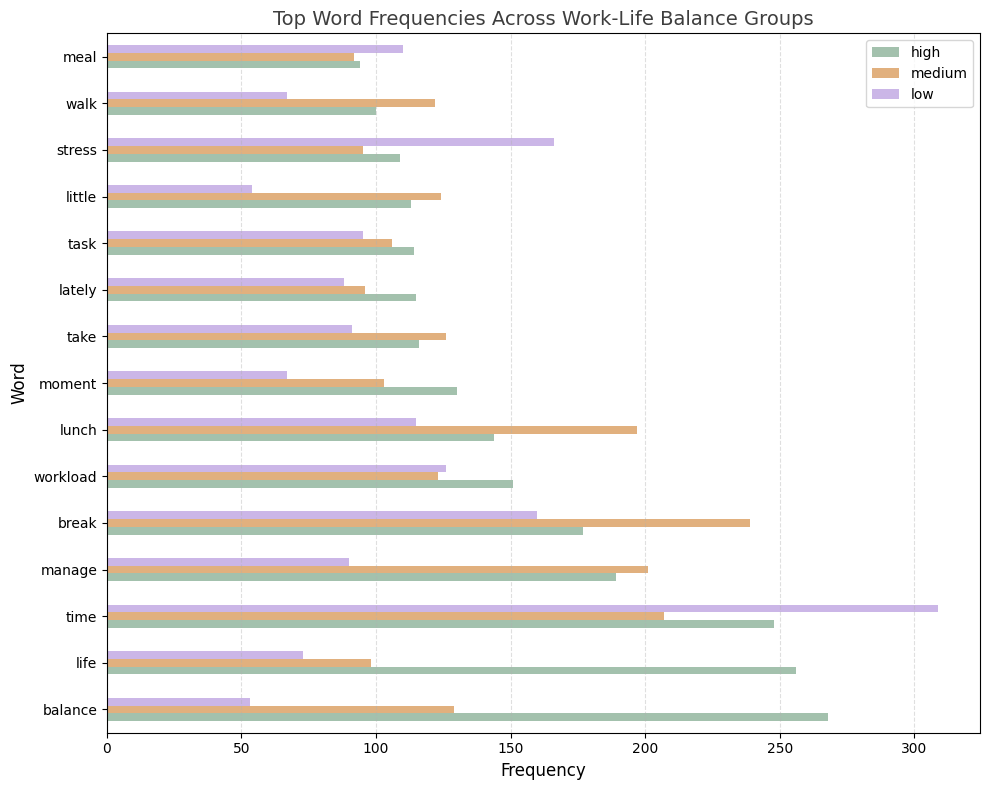

In [66]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# --- Custom stopwords ---
custom_stopwords = {"hey", "today", "the", "feel", "day", "find", "a", "like", "thing", "get", "just"}

# --- Define tertiles for WLB grouping ---
low_thresh = df_simulated['WORK_LIFE_BALANCE_SCORE'].quantile(0.33)
high_thresh = df_simulated['WORK_LIFE_BALANCE_SCORE'].quantile(0.66)

def assign_group(score):
    if score <= low_thresh:
        return 'low'
    elif score <= high_thresh:
        return 'medium'
    else:
        return 'high'

df_simulated['WLB_group'] = df_simulated['WORK_LIFE_BALANCE_SCORE'].apply(assign_group)

# --- Filter and flatten token lists ---
def get_filtered_words(group):
    return [word for tokens in df_simulated[df_simulated['WLB_group'] == group]['tokens'] for word in tokens if word not in custom_stopwords]

high_words = get_filtered_words('high')
medium_words = get_filtered_words('medium')
low_words = get_filtered_words('low')

# --- Get total word counts ---
all_words = high_words + medium_words + low_words
overall_counts = Counter(all_words)
top_words = [word for word, _ in overall_counts.most_common(15)]

# --- Count frequencies of top words by group ---
compare_df = pd.DataFrame({
    'word': top_words,
    'high': [high_words.count(w) for w in top_words],
    'medium': [medium_words.count(w) for w in top_words],
    'low': [low_words.count(w) for w in top_words],
})

# --- Plot ---
compare_df.set_index('word').sort_values('high', ascending=False).plot(
    kind='barh',
    figsize=(10, 8),
    color=['#A3C1AD', '#E1B07E', '#CBB6E7']
)

plt.title("Top Word Frequencies Across Work-Life Balance Groups", fontsize=14, color="#3E3E3E")
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Word Clouds

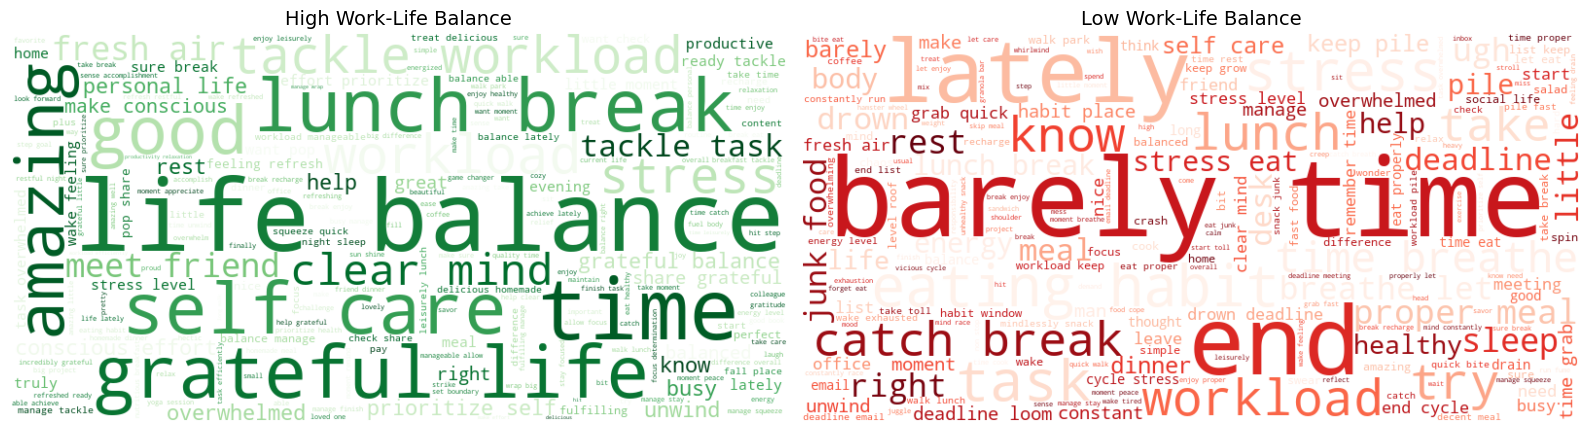

In [69]:
from wordcloud import WordCloud

# Define custom stopwords
custom_stopwords = {"hey", "today", "the", "feel", "day", "find", "a", "like", "thing", "get", "just"}

# Filter words for each group
high_filtered = [word for word in high_words if word not in custom_stopwords]
low_filtered  = [word for word in low_words if word not in custom_stopwords]

# Join words into strings
high_text = ' '.join(high_filtered)
low_text  = ' '.join(low_filtered)

# Plot side-by-side WordClouds
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

wc_high = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(high_text)
wc_low  = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(low_text)

axs[0].imshow(wc_high, interpolation='bilinear')
axs[0].set_title("High Work-Life Balance", fontsize=14)
axs[0].axis('off')

axs[1].imshow(wc_low, interpolation='bilinear')
axs[1].set_title("Low Work-Life Balance", fontsize=14)
axs[1].axis('off')

plt.tight_layout()
plt.show()


# Unsupervised Learning

## Text Data

### TF-IDF Vectorization

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_simulated['clean_text'])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


### LDA Topic Modeling

In [73]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(tfidf_matrix)

# Print top words per topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

display_topics(lda, tfidf.get_feature_names_out())

for i in range(lda_topics.shape[1]):
    df_simulated[f'Topic_{i+1}'] = lda_topics[:, i]

Topic 1: end, barely, time, deadline, eat, pile, stress, let, drown, email
Topic 2: want, make, conscious, changer, game, pop, share, granola, bar, prioritize
Topic 3: warm, luxury, probably, piece, satisfied, occasional, crucial, click, deep, afford
Topic 4: stressful, essential, groggy, emotion, reflection, hot, unfold, rarely, fancy, idea
Topic 5: manage, break, balance, lunch, little, life, time, walk, tackle, moment


### PCA for Visualization

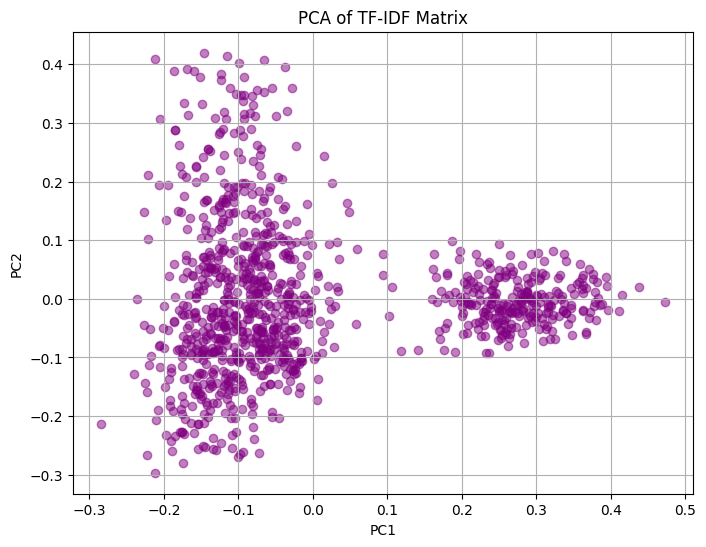

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Plot
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, c='purple')
plt.title("PCA of TF-IDF Matrix")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


###  KMeans Clustering

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add back to DataFrame
df_simulated['kmeans_cluster'] = clusters


# View cluster sizes
print(df_simulated['kmeans_cluster'].value_counts())


kmeans_cluster
2    277
1    267
3    191
4    144
0    121
Name: count, dtype: int64


### Visualize Clusters

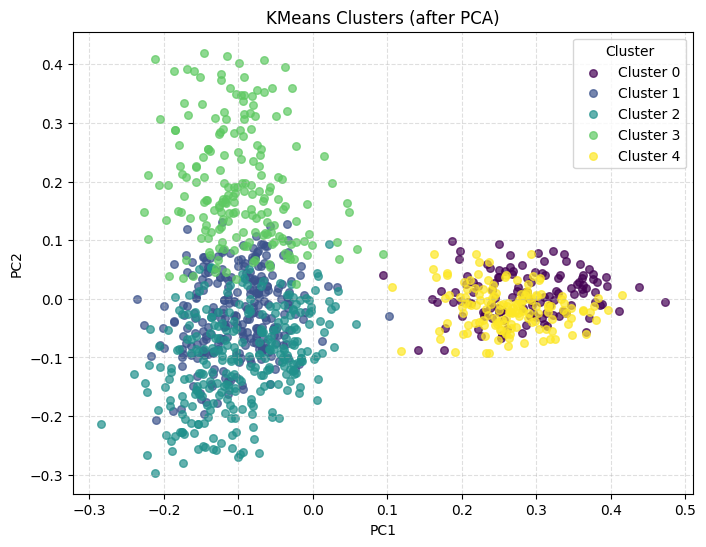


🔹 Top words per KMeans cluster:

Cluster 0:
tokens
time        151
stress       99
barely       87
end          85
eat          82
food         63
catch        62
pile         61
break        61
workload     61
Name: count, dtype: int64

Cluster 1:
tokens
time        175
manage      173
balance     166
break       158
life        157
tackle      155
lunch       136
grateful    130
workload    130
task        122
Name: count, dtype: int64

Cluster 2:
tokens
break     249
lunch     210
manage    196
walk      162
nice      129
little    128
take      128
time      121
mind      116
clear     115
Name: count, dtype: int64

Cluster 3:
tokens
balance       176
life          169
make          151
time          146
lately        128
prioritize    113
care          104
manage         96
grateful       96
self           93
Name: count, dtype: int64

Cluster 4:
tokens
time        171
end         122
barely      106
deadline     92
stress       77
eat          71
email        69
meal         67


In [79]:
# Assuming clusters is a 1D array with cluster assignments for each row in df_simulated
unique_clusters = np.unique(clusters)

plt.figure(figsize=(8, 6))

cmap = plt.get_cmap('viridis', len(unique_clusters))

for cluster_id in unique_clusters:
    cluster_points = pca_result[clusters == cluster_id]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=[cmap(cluster_id)],
        label=f"Cluster {cluster_id}",
        s=30,
        alpha=0.7
       
    )

plt.title("KMeans Clusters (after PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Cluster")
plt.show()

# --- View top words per cluster ---
print("\n🔹 Top words per KMeans cluster:")
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}:")
    cluster_tokens = df_simulated[df_simulated['kmeans_cluster'] == i]['tokens'].explode()
    print(cluster_tokens.value_counts().head(10))


## Numeric Data

### PCA

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Select numeric features for PCA
features = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']
X = df[features].dropna()

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Check number of components retained
print(f"PCA reduced from {X_scaled.shape[1]} to {X_pca.shape[1]} components")


PCA reduced from 5 to 5 components


### KMeans Clustering on PCA Features

In [83]:
from sklearn.cluster import KMeans

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add back to original rows (using .loc to align indexes)
df_pca_clustered = df.loc[X.index].copy()
df_pca_clustered['PCA_KMeans_Cluster'] = clusters


### Visualize Clusters

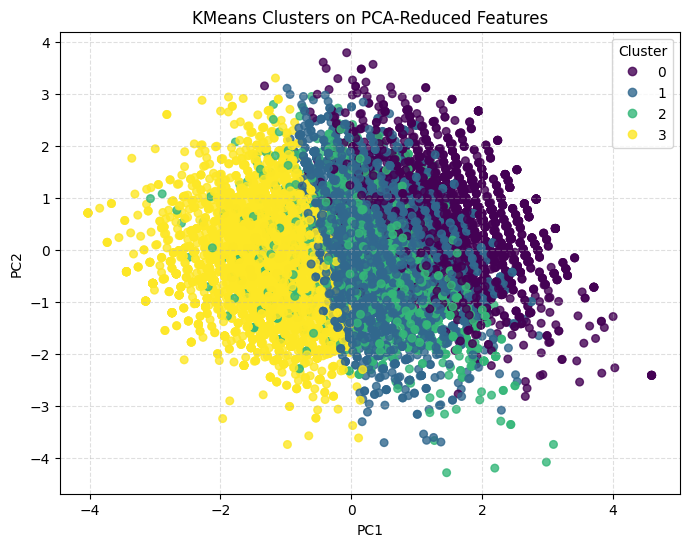

🔍 Cluster Characteristics Based on Original Features:
                    SLEEP_HOURS  DAILY_STEPS  DAILY_STRESS  TIME_FOR_PASSION  \
PCA_KMeans_Cluster                                                             
0                      6.764202     3.019387      3.328224          2.257439   
1                      6.843257     4.839073      3.251529          1.938043   
2                      7.155509     7.870849      2.878756          3.826041   
3                      7.361162     7.202662      1.946360          5.357532   

                    SUFFICIENT_INCOME  
PCA_KMeans_Cluster                     
0                            1.000000  
1                            2.000000  
2                            1.000000  
3                            1.998185  


In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=30, alpha=0.8)
plt.title("KMeans Clusters on PCA-Reduced Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


# Make a clean copy to avoid modifying your original DataFrame
df_clean = df_pca_clustered.copy()
# Save df_clean to a CSV file
df_clean.to_csv("clustered_data.csv", index=False)

# List of columns to convert to numeric
cols_to_convert = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']

# Convert to numeric (strings -> NaN)
for col in cols_to_convert:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Now compute cluster-wise means
cluster_summary = df_clean.groupby('PCA_KMeans_Cluster')[cols_to_convert].mean()

print("🔍 Cluster Characteristics Based on Original Features:")
print(cluster_summary)




🟣 **Cluster 0 – "Overworked and Under-rested"**  
"Struggles with low energy and stress. Sleeps the least, barely moves during the day, and feels financially insecure. Has little to no time for hobbies or relaxation."  
🟢 **Cluster 1 – "Stable but Stuck"**  
"Maintains a steady routine with decent activity and income, but rarely finds time for personal passions. Lives a structured but emotionally dull lifestyle."  
🟦 **Cluster 2 – "Active but Under Pressure"**  
"Stays physically active and gets enough sleep, yet feels the pinch of financial instability. Makes some time for personal joy but remains moderately stressed."  
🟡 **Cluster 3 – "Well-Balanced and Fulfilled"**  
"Leads a harmonious lifestyle with good sleep, daily movement, very low stress, and ample time for passion. Financially secure and emotionally content."  

### Compare Clusters vs Work-Life Balance Score

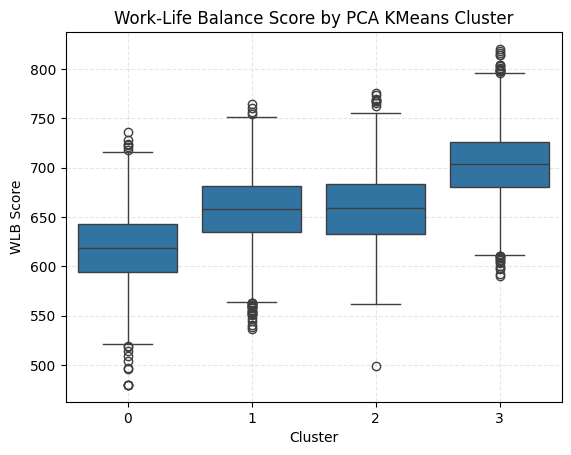

In [87]:
import seaborn as sns

sns.boxplot(x='PCA_KMeans_Cluster', y='WORK_LIFE_BALANCE_SCORE', data=df_pca_clustered)
plt.title("Work-Life Balance Score by PCA KMeans Cluster")
plt.xlabel("Cluster")
plt.ylabel("WLB Score")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()



| Cluster | Description                         | Median WLB Score | WLB Range   | Observations                                                      |
| ------- | ----------------------------------- | ---------------- | ----------- | ----------------------------------------------------------------- |
| **0**   | "Overworked and Under-rested"       | \~635            | \~530 – 710 | Lowest median WLB, lots of outliers at the low end (burnout risk) |
| **1**   | "Stable but Stuck"                  | \~670            | \~540 – 740 | Slightly better WLB, but still with a long lower tail             |
| **2**   | "Active but Under Pressure"         | \~665            | \~550 – 735 | WLB slightly below Cluster 1 overall, wide spread                 |
| **3**   | **"Well-Balanced and Fulfilled"** ✅ | \~715            | \~590 – 805 | Highest and tightest WLB scores — consistent well-being           |


## Feature Engineering Summary

The following features were engineered and added to enhance model performance and capture hidden patterns in the data:

### Topic Features (Text Data)
- Applied **TF-IDF vectorization** on cleaned `Lifestyle_Notes`.
- Performed **LDA Topic Modeling** with 5 topics.
- Extracted and added 5 topic probability features (`Topic_1` to `Topic_5`) to the dataset.
- Topics represent dominant themes found in lifestyle notes such as stress, activity, sleep, and balance.

### Cluster Features
- Conducted **KMeans clustering** on:
  - (1) **Text features**: Topic distributions (from LDA) after reducing dimensions with PCA → `Topic_KMeans_Cluster`
  - (2) **Numeric features**: `SLEEP_HOURS`, `DAILY_STEPS`, `DAILY_STRESS`, `TIME_FOR_PASSION`, `SUFFICIENT_INCOME` after PCA → `PCA_KMeans_Cluster`
- Both cluster labels were added as categorical features indicating groupings of similar lifestyle patterns.

### Lifestyle Categories
- Created categorical bins for:
  - **Sleep hours**: `Low Sleep`, `Average Sleep`, `High Sleep`
  - **Stress levels**: `Low Stress`, `Medium Stress`, `High Stress`
  - **Activity (Steps)**: `Low Activity`, `Moderate Activity`, `High Activity`
- These categorical variables help segment individuals into meaningful lifestyle groups.

### PCA Components
- Applied **PCA for visualization** of TF-IDF vectors and numeric feature clusters.
- While PCA was used primarily for plotting and dimensionality reduction before clustering, the transformed components were **not retained** as final features in the dataset.

---
In total, the following engineered features were added to the dataset:
- `Topic_1` to `Topic_5`
- `Topic_KMeans_Cluster`
- `PCA_KMeans_Cluster`
- `SLEEP_CATEGORY`, `STRESS_CATEGORY`, `STEPS_CATEGORY`


# Supervised Learning

## Regression - Predict Work Life Balance Score

### Regression on Numeric Features

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Features and Target ---
numeric_features = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']
X_num = df_pca_clustered[numeric_features]
y = df_pca_clustered['WORK_LIFE_BALANCE_SCORE']

# --- Model ---
model_num = LinearRegression()
model_num.fit(X_num, y)
y_pred_num = model_num.predict(X_num)

# --- Evaluation ---
print("Numeric Features Only:")
print("RMSE:", mean_squared_error(y, y_pred_num, squared=False))
print("MAE:", mean_absolute_error(y, y_pred_num))
print("R²:", r2_score(y, y_pred_num))


Numeric Features Only:
RMSE: 29.50870464371743
MAE: 23.741225627269497
R²: 0.5709632552896173


### Regression on Text-Based Topic Features

In [91]:
# --- Text Features ---
text_features = [col for col in df_simulated.columns if col.startswith('Topic_')]
X_text = df_simulated[text_features]
y_text = df_simulated['WORK_LIFE_BALANCE_SCORE']

# --- Model ---
model_text = LinearRegression()
model_text.fit(X_text, y_text)
y_pred_text = model_text.predict(X_text)

# --- Evaluation ---
print("Text Features Only:")
print("RMSE:", mean_squared_error(y_text, y_pred_text, squared=False))
print("MAE:", mean_absolute_error(y_text, y_pred_text))
print("R²:", r2_score(y_text, y_pred_text))


Text Features Only:
RMSE: 48.248289247521505
MAE: 38.6276
R²: 0.5699366139442139


### Regression on Combined Features (Numeric & Text Data)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- Numeric features ---
numeric_cols = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']
X_numeric = df[numeric_cols].reset_index(drop=True)

# --- LDA topics (convert from ndarray to DataFrame) ---
lda_df = pd.DataFrame(lda_topics, columns=[f'Topic_{i+1}' for i in range(lda_topics.shape[1])])
X_text = lda_df.reset_index(drop=True)

# --- Combine numeric and text features ---
df_combined = pd.concat([X_numeric, X_text], axis=1)

# --- Target ---
y_combined = df_simulated['WORK_LIFE_BALANCE_SCORE']

# --- Remove missing values ---
df_combined_clean = df_combined.dropna()
y_combined_clean = y_combined.loc[df_combined_clean.index]

# --- Fit model ---
model_combined = LinearRegression()
model_combined.fit(df_combined_clean, y_combined_clean)

# --- Predict and evaluate ---
y_pred_combined = model_combined.predict(df_combined_clean)

print("🔍 Evaluation of Combined Regression Model")
print("RMSE:", np.sqrt(mean_squared_error(y_combined_clean, y_pred_combined)))
print("MAE :", mean_absolute_error(y_combined_clean, y_pred_combined))
print("R²  :", r2_score(y_combined_clean, y_pred_combined))


🔍 Evaluation of Combined Regression Model
RMSE: 48.19390438556635
MAE : 38.64975480293314
R²  : 0.5709055915552159


### Improve Regression on Numeric Features

#### Ridge & Lasso

In [95]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Select numeric features ---
numeric_features = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']
X = df[numeric_features].copy()
y = df['WORK_LIFE_BALANCE_SCORE'].copy()

# --- Handle any NaNs just in case ---
X = X.dropna()
y = y.loc[X.index]  # Align target

# --- Standardize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)  # You can tune alpha later
ridge.fit(X_scaled, y)
y_pred_ridge = ridge.predict(X_scaled)

# --- Lasso Regression ---
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)
y_pred_lasso = lasso.predict(X_scaled)

# --- Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Results:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))
    print("-" * 40)

# --- Evaluate both models ---
evaluate_model("Ridge Regression", y, y_pred_ridge)
evaluate_model("Lasso Regression", y, y_pred_lasso)


Ridge Regression Results:
RMSE: 29.50870469018065
MAE : 23.741245776791075
R²  : 0.5709632539385292
----------------------------------------
Lasso Regression Results:
RMSE: 29.5093208343899
MAE : 23.743936855255903
R²  : 0.5709453371055658
----------------------------------------


#### Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Select numeric features and target
numeric_features = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']
X = df[numeric_features]
y = df['WORK_LIFE_BALANCE_SCORE']

# Drop missing values if any
X = X.dropna()
y = y.loc[X.index]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid Search for best Gradient Boosting model
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test_scaled)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Gradient Boosting Model:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.4f}")

Best Gradient Boosting Model:
RMSE: 29.37
MAE: 23.50
R²: 0.5790


#### Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X, y)

# Best model
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X)

# Evaluate
rmse = np.sqrt(mean_squared_error(y, y_pred_rf))
mae = mean_absolute_error(y, y_pred_rf)
r2 = r2_score(y, y_pred_rf)

print("Random Forest Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")


Random Forest Evaluation:
RMSE: 27.04
MAE : 21.71
R²  : 0.6398


## Multi-class Classification Based on Clusters

### Numeric Features

#### Random Forest Classifier

Classification Report (WLB Group from Numeric Features):
              precision    recall  f1-score   support

        high       0.22      0.22      0.22        58
         low       0.24      0.14      0.18        36
      medium       0.52      0.60      0.56        95

    accuracy                           0.40       189
   macro avg       0.33      0.32      0.32       189
weighted avg       0.37      0.40      0.38       189



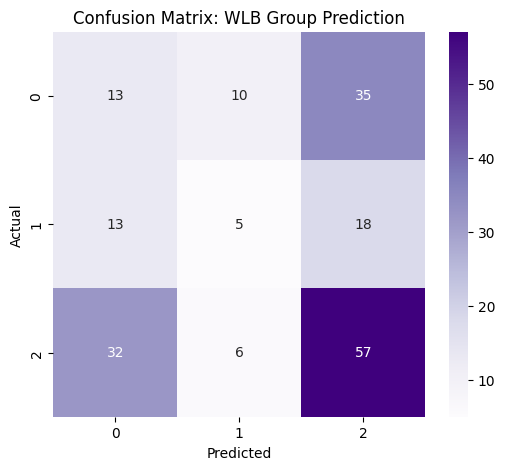

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare features and target
numeric_cols = ['SLEEP_HOURS', 'DAILY_STEPS', 'DAILY_STRESS', 'TIME_FOR_PASSION', 'SUFFICIENT_INCOME']
X = df_clean[numeric_cols].copy()
y = df_simulated['WLB_Group'].copy()

# Step 2: Drop rows where either X or y has NaN
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train model
model = RandomForestClassifier(
    class_weight='balanced',   # Handle class imbalance
    random_state=42,
)

model.fit(X_train, y_train)

# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("Classification Report (WLB Group from Numeric Features):")
print(classification_report(y_test, y_pred))

# Step 7: Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: WLB Group Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Gradient Boosting

📋 Gradient Boosting Report:
              precision    recall  f1-score   support

        high       0.26      0.29      0.28        58
         low       0.19      0.28      0.22        36
      medium       0.59      0.43      0.50        95

    accuracy                           0.36       189
   macro avg       0.34      0.33      0.33       189
weighted avg       0.41      0.36      0.38       189



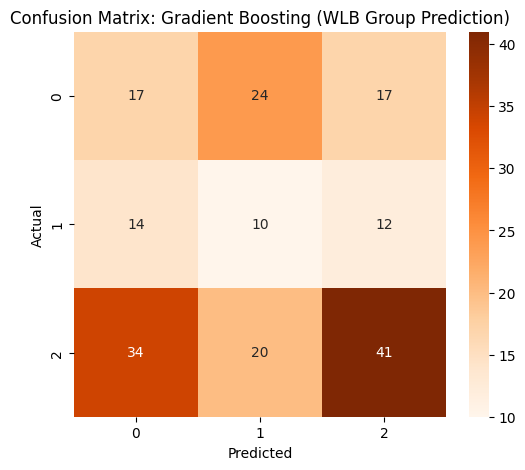

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train Gradient Boosting with sample weights
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("📋 Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix: Gradient Boosting (WLB Group Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### Text Features

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already created the TF-IDF matrix like this:
# tfidf = TfidfVectorizer(stop_words='english', max_features=100)
# tfidf_matrix = tfidf.fit_transform(df['Lifestyle_Notes'])

# Convert sparse matrix to DataFrame
X_text = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Align with WLB_Group from df_clean (resetting index just in case)
y_text = df_simulated['WLB_Group'].reset_index(drop=True)

# Drop rows with missing labels
mask = y_text.notnull()
X_text = X_text[mask]
y_text = y_text[mask]


X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, stratify=y_text, random_state=42
)


#### Random Forest Classifier - TF-IDF

📋 Random Forest (TF-IDF Features):
              precision    recall  f1-score   support

        high       1.00      0.84      0.91        62
         low       0.70      0.92      0.80        38
      medium       0.87      0.85      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200



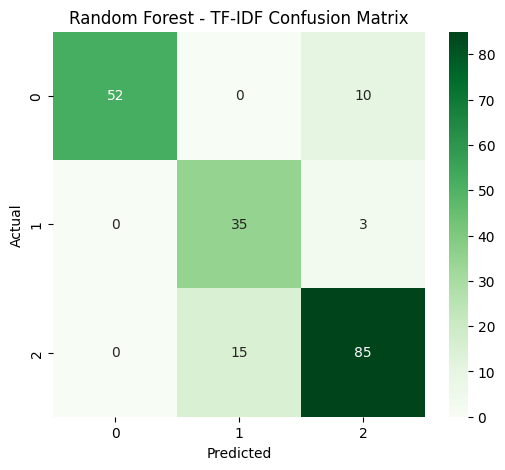

In [130]:
rf_model_tfidf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_tfidf.fit(X_train_text, y_train_text)
rf_pred_tfidf = rf_model_tfidf.predict(X_test_text)

print("📋 Random Forest (TF-IDF Features):")
print(classification_report(y_test_text, rf_pred_tfidf))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_text, rf_pred_tfidf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - TF-IDF Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Random Forest Classifier - LDA

📋 Random Forest (Text Features):
              precision    recall  f1-score   support

        high       1.00      0.84      0.91        62
         low       0.70      0.92      0.80        38
      medium       0.87      0.85      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200



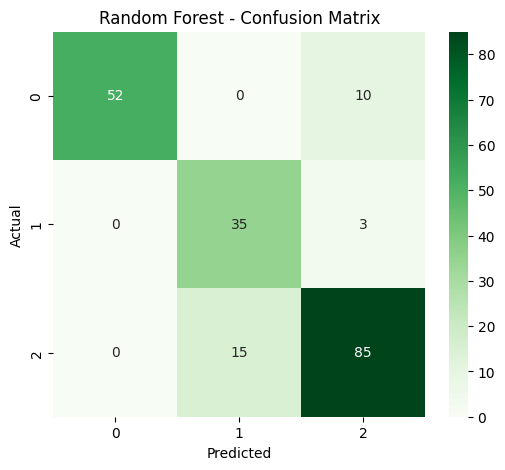

In [132]:
rf_text_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_text_model.fit(X_train_text, y_train_text)
rf_pred = rf_text_model.predict(X_test_text)

print("📋 Random Forest (Text Features):")
print(classification_report(y_test_text, rf_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_text, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Random Forest Classifier - TF-IDF

📋 Logistic Regression (TF-IDF Features):
              precision    recall  f1-score   support

        high       0.91      0.98      0.95        62
         low       0.70      1.00      0.83        38
      medium       0.99      0.78      0.87       100

    accuracy                           0.89       200
   macro avg       0.87      0.92      0.88       200
weighted avg       0.91      0.89      0.89       200



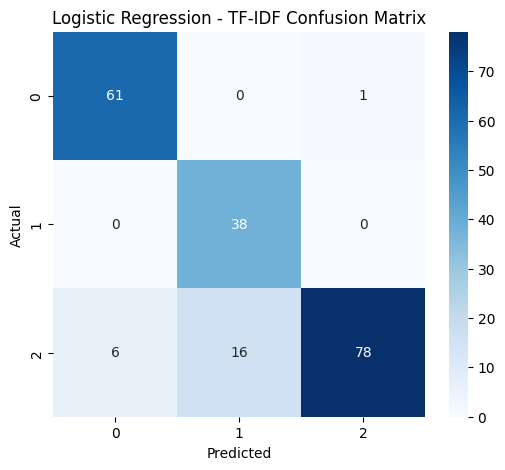

In [134]:
lr_model_tfidf = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model_tfidf.fit(X_train_text, y_train_text)
lr_pred_tfidf = lr_model_tfidf.predict(X_test_text)

print("📋 Logistic Regression (TF-IDF Features):")
print(classification_report(y_test_text, lr_pred_tfidf))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_text, lr_pred_tfidf), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - TF-IDF Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Random Forest Classifier - LDA

📋 Logistic Regression (Text Features):
              precision    recall  f1-score   support

        high       0.91      0.98      0.95        62
         low       0.70      1.00      0.83        38
      medium       0.99      0.78      0.87       100

    accuracy                           0.89       200
   macro avg       0.87      0.92      0.88       200
weighted avg       0.91      0.89      0.89       200



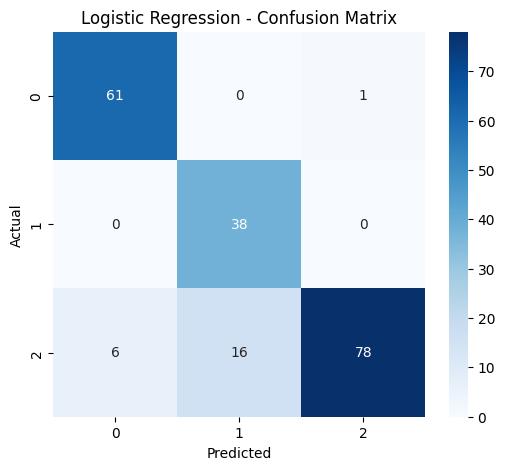

In [136]:
lr_text_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_text_model.fit(X_train_text, y_train_text)
lr_pred = lr_text_model.predict(X_test_text)

print("📋 Logistic Regression (Text Features):")
print(classification_report(y_test_text, lr_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_text, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparison  
| Model Type         | Input Features     | Algorithm         | RMSE    | MAE     | R²      | Accuracy (Classif.) | F1 Score |
| ------------------ | ------------------ | ----------------- | ------- | ------- | ------- | ------------------- | -------- |
| **Regression**     | Numeric Only       | Random Forest     | 27.04   | 21.71   | 0.64    | –                   | –        |
| **Regression**     | Numeric Only       | Gradient Boosting | 29.37   | 23.50   | 0.579   | –                   | –        |
| **Regression**     | Numeric Only       | Ridge/Lasso       | \~29.51 | \~23.74 | \~0.571 | –                   | –        |
| **Regression**     | Text Only (TF-IDF) | Gradient Boosting | 49.76   | 40.78   | 0.543   | –                   | –        |
| **Regression**     | Numeric + Text     | Gradient Boosting | 49.68   | 40.72   | 0.544   | –                   | –        |
| **Classification** | Numeric Only       | Random Forest     | –       | –       | –       | 0.40                | 0.38     |
| **Classification** | Numeric Only       | Gradient Boosting | –       | –       | –       | 0.36                | 0.38     |
| **Classification** | Text Only (TF-IDF) | Random Forest     | –       | –       | –       | 0.89                | 0.57     |


Streamlit App

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

# Prepare data
X = df[numeric_cols].copy()
y = df_simulated['WLB_Group'].copy()

# Drop NaNs
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Optional: encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # converts 'low', 'medium', 'high' to 0, 1, 2

# Sample weights to handle imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_encoded)

# Define model and param grid
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']  # Handles imbalance internally
}

# Grid search
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)
grid.fit(X, y_encoded, sample_weight=sample_weights)

# Best model
best_model = grid.best_estimator_
print("✅ Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END class_weight=balanced, max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END cla

In [ ]:

!streamlit run app.py



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.20.9:8502



# Business Recommendations  
**Key Drivers of Work-Life Balance (WLB):**  

**From Numeric Models:**  
- Lower WLB scores correlated with high screen time, irregular sleep, and low physical activity.  
- Higher WLB linked to time spent with family, regular exercise, and having hobbies.  
**From Text-Based Models (TF-IDF + Topic Patterns):**  
- High WLB Notes: Included themes like “morning routine”, “evening walks”, “journaling”  
- Low WLB Notes: Described “no time for self”, “working till late”, “exhausted every night”  

**Targeted Recommendations:**  

🟠 **For Users with Low WLB:**  
- Introduce structured daily routines and boundaries on screen time.  
- Encourage journaling or low-effort mindfulness activities.

🔵 **For Medium WLB:**  
- Offer habit tracking tools for consistent sleep and exercise.  
- Personalized feedback loops based on daily entries or wearable data.  

🟢 **For High WLB:**  
- Maintain positive habits via weekly reflections.  
- Empower them to mentor others or share wellbeing tips within a platform.  


# Limitations & Assumptions  

**Synthetic Text Data:**  
- Lifestyle notes were simulated using structured templates, limiting natural variability, tone, and nuance of actual user input.  

**Feature Engineering Biases:**  
- Binning WLB into low/medium/high may flatten subtleties in continuous scoring.  
- Thresholds used for binning may not generalize well across populations.  

**Model Tradeoffs:**  
- Text-only classification outperformed numeric in accuracy, but regression suffered from using text alone.  
- Combined models underperformed, possibly due to feature imbalance or redundancy.  

**Dataset Constraints:**  
- No demographics (e.g., age, occupation), job-related metrics (hours, workload), or mental health indicators.  
- Imbalanced class distributions (e.g., 'medium' overrepresented) may have impacted classifier learning.  

# Next Steps  

**Collect Real Lifestyle Journals:**  
- Replace simulated notes with actual user input to improve linguistic diversity and authenticity.

**Balance the Dataset:**  
- Address class imbalance through up/down sampling or stratified augmentation.

**Incorporate Demographics & Context:**  
- Add features like occupation, job satisfaction, and number of dependents for more personalized modeling.

**Enhance NLP Pipeline:**  
- Try transformer-based embeddings (e.g., BERT) or fine-tuned models for richer understanding of text data.

**Build a Feedback-Driven Tool:**
- Develop a wellbeing tracking app that:
    - Scores user WLB
    - Shows daily trend dashboards
    - Suggests tips based on text patterns
    - Nudges users with behaviorally informed interventions